# Task 1: Data Understanding \& Preparation

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
import warnings 

warnings.filterwarnings('ignore')

## Loading the dataset

In [131]:
df = pd.read_csv('../dataset/customer_supermarket.csv', sep='\t', index_col=0)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
541905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
541906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
541908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [132]:
n_samples = df.shape[0]
n_samples

471910

## Basic checks

In [133]:
df.drop_duplicates(ignore_index=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
466673,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
466674,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
466675,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
466676,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [137]:
duplicates = n_samples - df.shape[0]
print('Number of canceled duplicates: {}/{} ({:.2f}%)'.format(duplicates, n_samples, duplicates / n_samples * 100))

Number of canceled duplicates: 5232/471910 (1.11%)


In [138]:
df.dtypes

BasketID            object
BasketDate          object
Sale                object
CustomerID         float64
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object

In [139]:
df['Sale'] = df['Sale'].str.replace(',', '.')
df['Sale'] = pd.to_numeric(df['Sale'])
df = df.astype({'BasketDate': 'datetime64',
                'CustomerID': 'object'})

In [140]:
df.dtypes

BasketID                   object
BasketDate         datetime64[ns]
Sale                      float64
CustomerID                 object
CustomerCountry            object
ProdID                     object
ProdDescr                  object
Qta                         int64
dtype: object

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466678 entries, 0 to 466677
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         466678 non-null  object        
 1   BasketDate       466678 non-null  datetime64[ns]
 2   Sale             466678 non-null  float64       
 3   CustomerID       401605 non-null  object        
 4   CustomerCountry  466678 non-null  object        
 5   ProdID           466678 non-null  object        
 6   ProdDescr        465925 non-null  object        
 7   Qta              466678 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 28.5+ MB


In [142]:
df.isnull().any()

BasketID           False
BasketDate         False
Sale               False
CustomerID          True
CustomerCountry    False
ProdID             False
ProdDescr           True
Qta                False
dtype: bool

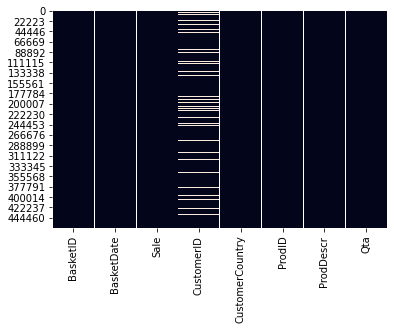

In [143]:
sns.heatmap(df.isnull(), cbar=False);

In [144]:
df.describe()

,Sale,Qta
count,466678.000000,466678.000000
mean,4.049057,10.806528
std,84.237135,232.627771
min,-11062.060000,-80995.000000
25%,1.250000,2.000000
50%,2.080000,4.000000
75%,3.750000,12.000000
max,38970.000000,80995.000000


## Data Cleaning and Integration

### Basket IDs

The first lines of this list shows several things worthy of interest:

- the existence of entries with the prefix C for the BasketID variable: this indicates transactions that have been canceled
- the existence of users who only came once and only purchased one product (e.g., 12346)
- the existence of frequent users that buy a large number of items at each order

In [29]:
tmp = df.groupby(by=['CustomerID', 'BasketID'], as_index=False)['BasketDate'].count()
nb_products_per_basket = tmp.rename(columns={'BasketDate': 'NoProds'})
nb_products_per_basket['NoCanceled'] = nb_products_per_basket['BasketID'].apply(lambda x: int('C' in x))
nb_products_per_basket

,CustomerID,BasketID,NoProds,NoCanceled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0
...,...,...,...,...
22185,18283.0,579673,50,0
22186,18283.0,580872,50,0
22187,18287.0,554065,29,0
22188,18287.0,570715,38,0


In [30]:
n1 = nb_products_per_basket['NoCanceled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1 / n2 * 100))

Number of orders canceled: 3654/22190 (16.47%) 


### Product IDs

Above, it has been seen that some values of the *ProdID* variable indicate a particular transaction (i.e., D for Discount). We check the contents of this variable by looking for the set of codes that would contain only letters:

In [145]:
special_codes = df[df['ProdID'].str.contains('^[a-zA-Z]+', regex=True)]['ProdID'].unique()
special_codes

array(['POST', 'D', 'C2', 'M', 'DOT', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'gift_0001_40', 'm', 'gift_0001_30', 'gift_0001_20',
       'DCGS0072', 'DCGS0069', 'DCGS0057', 'DCGS0003', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'gift_0001_10', 'DCGS0004', 'gift_0001_50',
       'DCGS0073', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK'],
      dtype=object)

In [146]:
for code in special_codes:
    print("{:<15} -> {:<30}".format(code, df[df['ProdID'] == code]['ProdDescr'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
DOT             -> DOTCOM POSTAGE                
BANK CHARGES    -> Bank Charges                  
S               -> SAMPLES                       
AMAZONFEE       -> AMAZON FEE                    
DCGS0076        -> SUNJAR LED NIGHT NIGHT LIGHT  
gift_0001_40    -> Dotcomgiftshop Gift Voucher £40.00
m               -> Manual                        
gift_0001_30    -> Dotcomgiftshop Gift Voucher £30.00
gift_0001_20    -> Dotcomgiftshop Gift Voucher £20.00
DCGS0072        -> nan                           
DCGS0069        -> OOH LA LA DOGS COLLAR         
DCGS0057        -> nan                           
DCGS0003        -> BOXED GLASS ASHTRAY           
DCGSSBOY        -> BOYS PARTY BAG                
DCGSSGIRL       -> GIRLS PARTY BAG               
PADS            -> PADS TO MATCH ALL C

We see that there are several types of peculiar transactions, connected e.g., to port charges or bank charges.

In [147]:
df = df[~df.ProdID.isin(special_codes)]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
464263,581587,2011-09-12 12:50:00,0.85,12680,France,22613,PACK OF 20 SPACEBOY NAPKINS,12
464264,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6
464265,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
464266,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4


### Products Descriptions

First of all, it seems that there are some null descriptions:

In [148]:
prods = df.groupby('ProdID')['ProdDescr'].describe().reset_index()
prods

,ProdID,count,unique,top,freq
0,10002,62,1,INFLATABLE POLITICAL GLOBE,62
1,10080,21,1,GROOVY CACTUS INFLATABLE,21
2,10120,29,1,DOGGY RUBBER,29
3,10123C,3,1,HEARTS WRAPPING TAPE,3
4,10123G,0,0,NaN,NaN
...,...,...,...,...,...
3919,90214U,1,1,"LETTER ""U"" BLING KEY RING",1
3920,90214V,8,1,"LETTER ""V"" BLING KEY RING",8
3921,90214W,4,1,"LETTER ""W"" BLING KEY RING",4
3922,90214Y,5,1,"LETTER ""Y"" BLING KEY RING",5


In order to clean in this sense, we need to remove rows for which the *ProdID* appear just one time with null description:

In [149]:
null_prods = prods[(prods['count'] == 0) & (prods['top'].isnull())]
null_prods

,ProdID,count,unique,top,freq
4,10123G,0,0,NaN,NaN
9,10134,0,0,NaN,NaN
46,16053,0,0,NaN,NaN
85,17011A,0,0,NaN,NaN
187,20738,0,0,NaN,NaN
...,...,...,...,...,...
3380,85044,0,0,NaN,NaN
3630,90037D,0,0,NaN,NaN
3698,90091,0,0,NaN,NaN
3702,90095,0,0,NaN,NaN


In [150]:
df = df[~df.ProdID.isin(null_prods.ProdID)]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
464202,581587,2011-09-12 12:50:00,0.85,12680,France,22613,PACK OF 20 SPACEBOY NAPKINS,12
464203,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6
464204,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
464205,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4


Then, in order to integrate the remaining null descriptions, we copy the description of the product with the same *ProdID* for those in which it missing:

In [152]:
df['ProdDescr'] = np.where(df['ProdDescr'].isnull(), df['ProdID'].map(prods.set_index('ProdID')['top']), df['ProdDescr'])

In [153]:
df['ProdDescr'].isnull().any()

False

Now we need to remove the rows corresponding to lower or mixed case descriptions which will be not effective for the feature extraction step since they don't represent a product description:

In [154]:
df[(df['ProdDescr'].str.islower()) | # lower case
   (~df['ProdDescr'].str.islower() & ~df['ProdDescr'].str.isupper())]['ProdDescr'].unique() # mixed case

array(['BAG 500g SWIRLY MARBLES', 'POLYESTER FILLER PAD 45x45cm',
       'POLYESTER FILLER PAD 45x30cm', 'POLYESTER FILLER PAD 40x40cm',
       'FRENCH BLUE METAL DOOR SIGN No', 'BAG 250g SWIRLY MARBLES',
       'BAG 125g SWIRLY MARBLES', '3 TRADITIONAl BISCUIT CUTTERS  SET',
       'NUMBER TILE COTTAGE GARDEN No', 'amazon',
       'FOLK ART GREETING CARD,pack/12',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'POLYESTER FILLER PAD 65CMx65CM', "Dad's Cab Electronic Meter",
       'NUMBER TILE VINTAGE FONT No ', 'Dotcom sales',
       'POLYESTER FILLER PAD 30CMx30CM', 'reverse 21/5/10 adjustment',
       'mouldy, thrown away.', 'found', 'Found',
       "Dr. Jam's Arouzer Stress Ball", '?', 'label mix up',
       'samples/damages', 'thrown away', 'damages', 'showroom',
       'wrongly sold as sets', 'dotcom sold sets', 'Amazon sold sets',
       'wrongly sold sets', '?sold as sets?', 'damages/display',
       'damaged stock', 'damages?', 're dotcom quick fix.',
       'sold in set

In [157]:
df['ProdDescr'] = df['ProdDescr'].str.replace('[^\w\s]', '') # removing punctuation
df['ProdDescr'] = df['ProdDescr'].str.replace('\w*\d\w*', '') # removing words with numbers

df['ProdDescr'] = df['ProdDescr'].str.strip() # removing spaces at the beginning and at the end

# adjusting errors
df['ProdDescr'] = df['ProdDescr'].str.replace('No', '') # removing 'No'
df['ProdDescr'].replace({'TRADITIONAl BISCUIT CUTTERS  SET': 'TRADITIONAl BISCUIT CUTTERS  SET'.upper()}, inplace=True)
df['ProdDescr'].replace({'Dads Cab Electronic Meter': 'Dads Cab Electronic Meter'.upper()}, inplace=True)
df['ProdDescr'].replace({'Dr Jams Arouzer Stress Ball': 'Dr Jams Arouzer Stress Ball'.upper()}, inplace=True)
df['ProdDescr'].replace({'Dotcomgiftshop Gift Voucher': 'Dotcomgiftshop Gift Voucher'.upper()}, inplace=True)
df['ProdDescr'].replace({'FLOWERS HANDBAG blue and orange': 'FLOWERS HANDBAG blue and orange'.upper()}, inplace=True)

del_descr = df[(df['ProdDescr'].str.islower()) | # lower case
               (~df['ProdDescr'].str.islower() & ~df['ProdDescr'].str.isupper())]['ProdDescr'].unique() # mixed case
del_descr

array(['amazon', 'Dotcom sales', 'reverse  adjustment',
       'mouldy thrown away', 'found', 'Found', '', 'label mix up',
       'samplesdamages', 'thrown away', 'damages', 'showroom',
       'wrongly sold as sets', 'dotcom sold sets', 'Amazon sold sets',
       'wrongly sold sets', 'sold as sets', 'damagesdisplay',
       'damaged stock', 're dotcom quick fix', 'sold in set', 'damaged',
       'Damaged', 'Missing', 'adjustment', 'returned', 'wrong code',
       'crushed', 'damagescredits from ASOS', 'mailout',
       't rcvd in  delivery', 'Thrown awayrusty', 'damagesdotcom',
       'smashed', 'reverse previous adjustment',
       'incorrectly credited  see', 'Next Day Carriage', 'wet damaged',
       'Water damaged', 'missing', 'sold as set on dotcom',
       'mix up with c', 'came coded as',
       'alan hodge cant mamage this section', 'dotcom',
       'Sold as  on dotcom', 'taig adjust no stock', 'display',
       'taig adjust', 'allocate stock for dotcom orders ta',
       'add 

In [170]:
df = df[~(df['ProdDescr'].isin(del_descr))]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART TLIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART,6
...,...,...,...,...,...,...,...,...
463913,581587,2011-09-12 12:50:00,0.85,12680,France,22613,PACK OF SPACEBOY NAPKINS,12
463914,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDRENS APRON DOLLY GIRL,6
463915,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
463916,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4


### Sales

Since there is no currency associated with the sale price, it is assumed to be the same for all records, furthermore, it is assumed that the sale price refers to a single item.

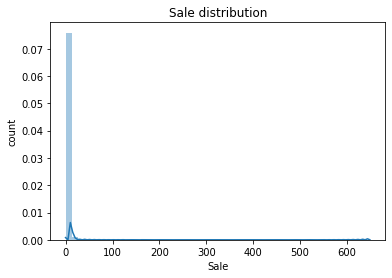

In [171]:
sns.distplot(df['Sale'])
plt.title('Sale distribution')
plt.xlabel('Sale')
plt.ylabel('count');

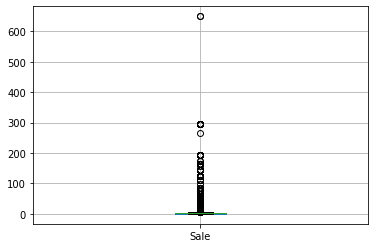

In [176]:
df.boxplot('Sale');

In [172]:
df[df['Sale'] == 0]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1688,536546,2010-01-12 14:33:00,0.0,NaN,United Kingdom,22145,CHRISTMAS CRAFT HEART STOCKING,1
1720,536553,2010-01-12 14:35:00,0.0,NaN,United Kingdom,37461,FUNKY MONKEY MUG,3
3668,536764,2010-02-12 14:42:00,0.0,NaN,United Kingdom,84952C,MIRROR LOVE BIRD TLIGHT HOLDER,-38
3669,536765,2010-02-12 14:43:00,0.0,NaN,United Kingdom,84952C,MIRROR LOVE BIRD TLIGHT HOLDER,19
5904,536996,2010-03-12 15:30:00,0.0,NaN,United Kingdom,22712,CARD DOLLY GIRL,-20
...,...,...,...,...,...,...,...,...
459172,581209,2011-07-12 18:35:00,0.0,NaN,United Kingdom,21620,SET OF ROSE BOTANICAL CANDLES,6
459173,581211,2011-07-12 18:36:00,0.0,NaN,United Kingdom,22142,CHRISTMAS CRAFT WHITE FAIRY,14
460051,581234,2011-08-12 10:33:00,0.0,NaN,United Kingdom,72817,SET OF CHRISTMAS DECOUPAGE CANDLE,27
461419,581406,2011-08-12 13:58:00,0.0,NaN,United Kingdom,46000M,POLYESTER FILLER PAD,240


In [173]:
df['Sale'].replace(0, np.nan, inplace=True)
df[df['Sale'].isnull()]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1688,536546,2010-01-12 14:33:00,NaN,NaN,United Kingdom,22145,CHRISTMAS CRAFT HEART STOCKING,1
1720,536553,2010-01-12 14:35:00,NaN,NaN,United Kingdom,37461,FUNKY MONKEY MUG,3
3668,536764,2010-02-12 14:42:00,NaN,NaN,United Kingdom,84952C,MIRROR LOVE BIRD TLIGHT HOLDER,-38
3669,536765,2010-02-12 14:43:00,NaN,NaN,United Kingdom,84952C,MIRROR LOVE BIRD TLIGHT HOLDER,19
5904,536996,2010-03-12 15:30:00,NaN,NaN,United Kingdom,22712,CARD DOLLY GIRL,-20
...,...,...,...,...,...,...,...,...
459172,581209,2011-07-12 18:35:00,NaN,NaN,United Kingdom,21620,SET OF ROSE BOTANICAL CANDLES,6
459173,581211,2011-07-12 18:36:00,NaN,NaN,United Kingdom,22142,CHRISTMAS CRAFT WHITE FAIRY,14
460051,581234,2011-08-12 10:33:00,NaN,NaN,United Kingdom,72817,SET OF CHRISTMAS DECOUPAGE CANDLE,27
461419,581406,2011-08-12 13:58:00,NaN,NaN,United Kingdom,46000M,POLYESTER FILLER PAD,240


In [174]:
df['Sale'] = df.groupby('ProdID')['Sale'].transform(lambda x: x.replace(to_replace=np.nan, value=x.mean()))

In [175]:
df['Sale'].isnull().any()

False

We can use the interquartile range method to reduce the outliers and distribution skewness:

- IQR = Q3 - Q1
- lower bound = Q1 - 1.5 * IQR
- upper bound = Q3 + 1.5 * IQR

In [177]:
q1 = df['Sale'].quantile(0.25)
q3 = df['Sale'].quantile(0.75)
IQR = q3 - q1
IQR

2.5

In [178]:
df = df[~((df['Sale'] < (q1 - 1.5 * IQR)) | (df['Sale'] > (q3 + 1.5 * IQR)))]
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART TLIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART,6
...,...,...,...,...,...,...,...,...
463913,581587,2011-09-12 12:50:00,0.85,12680,France,22613,PACK OF SPACEBOY NAPKINS,12
463914,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDRENS APRON DOLLY GIRL,6
463915,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
463916,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4


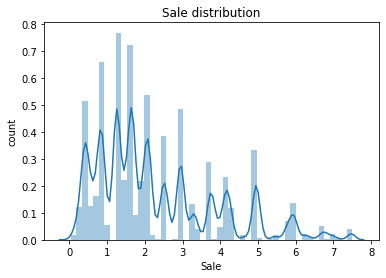

In [180]:
sns.distplot(df['Sale'])
plt.title('Sale distribution')
plt.xlabel('Sale')
plt.ylabel('count');

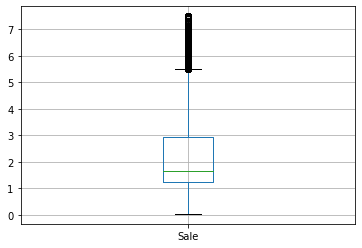

In [179]:
df.boxplot('Sale');

### Customer Countries

As customer clusters may vary by geography, we’ll restrict the data to only United Kingdom customers, which contains most of our customers historical data:

In [181]:
df['CustomerCountry'].value_counts()

United Kingdom          380128
Germany                   8311
France                    7525
EIRE                      6744
Netherlands               2187
Spain                     2177
Belgium                   1767
Switzerland               1704
Portugal                  1358
Australia                 1175
Norway                     939
Italy                      656
Finland                    587
Channel Islands            583
Cyprus                     512
Sweden                     428
Austria                    357
Japan                      348
Denmark                    348
Unspecified                307
USA                        280
Poland                     278
Israel                     239
Singapore                  202
Iceland                    175
Canada                     139
Greece                     128
Hong Kong                  119
Malta                      104
United Arab Emirates        62
European Community          48
RSA                         45
Lithuani

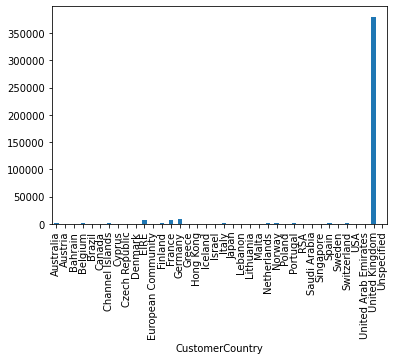

In [182]:
df['CustomerCountry'].groupby(df['CustomerCountry']).count().plot(kind='bar');

As customer clusters may vary by geography, we’ll restrict the data to only United Kingdom customers, which contains most of our customers historical data.

In [183]:
df = df[df['CustomerCountry'] == 'United Kingdom']
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART TLIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART,6
...,...,...,...,...,...,...,...,...
380123,581585,2011-09-12 12:31:00,0.95,15804,United Kingdom,23145,ZINC TLIGHT HOLDER STAR LARGE,12
380124,581585,2011-09-12 12:31:00,1.95,15804,United Kingdom,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12
380125,581586,2011-09-12 12:49:00,2.95,13113,United Kingdom,22061,LARGE CAKE STAND HANGING STRAWBERY,8
380126,581586,2011-09-12 12:49:00,1.25,13113,United Kingdom,23275,SET OF HANGING OWLS OLLIE BEAK,24


In [184]:
df.drop('CustomerCountry', axis=1, inplace=True)

### Customers

We remove the records for which the *BasketID* is null:

In [185]:
df[df['CustomerID'].isnull()]

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
1162,536544,2010-01-12 14:32:00,2.51,NaN,21774,DECORATIVE CATS BATHROOM BOTTLE,2
1163,536544,2010-01-12 14:32:00,1.66,NaN,21787,RAIN PONCHO RETROSPOT,2
1164,536544,2010-01-12 14:32:00,1.66,NaN,21790,VINTAGE SNAP CARDS,9
1165,536544,2010-01-12 14:32:00,2.51,NaN,21791,VINTAGE HEADS AND TAILS CARD GAME,2
1166,536544,2010-01-12 14:32:00,0.43,NaN,21802,CHRISTMAS TREE HEART DECORATION,9
...,...,...,...,...,...,...,...
379859,581498,2011-09-12 10:26:00,4.13,NaN,82600,SINGING METAL SIGN,4
379860,581498,2011-09-12 10:26:00,5.79,NaN,84032A,CHARLIELOLA PINK HOT WATER BOTTLE,4
379861,581498,2011-09-12 10:26:00,4.13,NaN,85038,CHOCOLATE LOVE HEART TLIGHTS,1
379862,581498,2011-09-12 10:26:00,3.29,NaN,85049a,TRADITIONAL CHRISTMAS RIBBONS,5


In [186]:
df = df[~df['CustomerID'].isnull()]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,85123A,WHITE HANGING HEART TLIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,84029E,RED WOOLLY HOTTIE WHITE HEART,6
...,...,...,...,...,...,...,...
326095,581585,2011-09-12 12:31:00,0.95,15804,23145,ZINC TLIGHT HOLDER STAR LARGE,12
326096,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12
326097,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8
326098,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF HANGING OWLS OLLIE BEAK,24


In [187]:
df['CustomerID'].isnull().any()

False

### Basket Dates

We noticed that 2010 data aren't enough representative, they are only a small fraction of the dataset and they appear to be only around the 12th of the month; in contrast 2011's data are more uniformely distributed, so we decide to keep only the latter:

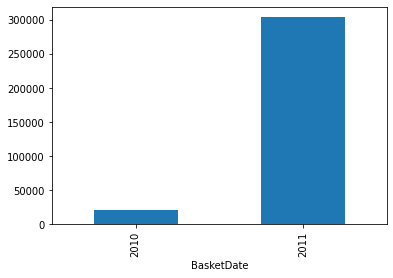

In [188]:
df['BasketDate'].groupby(df['BasketDate'].dt.year).count().plot(kind='bar');

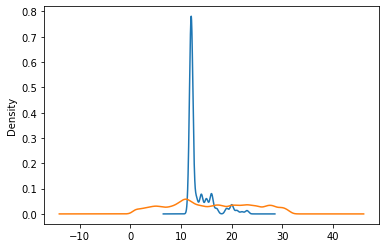

In [189]:
fig, ax = plt.subplots(1, 1)
df[df['BasketDate'].dt.year == 2010]['BasketDate'].dt.day.plot(kind='kde', ax=ax);
df[df['BasketDate'].dt.year == 2011]['BasketDate'].dt.day.plot(kind='kde', ax=ax);

In [190]:
df = df[df['BasketDate'].dt.year == 2011]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
0,539993,2011-04-01 10:00:00,1.95,13313,22386,JUMBO BAG PINK POLKADOT,10
1,539993,2011-04-01 10:00:00,0.42,13313,21499,BLUE POLKADOT WRAP,25
2,539993,2011-04-01 10:00:00,0.42,13313,21498,RED RETROSPOT WRAP,25
3,539993,2011-04-01 10:00:00,2.10,13313,22379,RECYCLING BAG RETROSPOT,5
4,539993,2011-04-01 10:00:00,1.25,13313,20718,RED RETROSPOT SHOPPER BAG,10
...,...,...,...,...,...,...,...
304260,581585,2011-09-12 12:31:00,0.95,15804,23145,ZINC TLIGHT HOLDER STAR LARGE,12
304261,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12
304262,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8
304263,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF HANGING OWLS OLLIE BEAK,24


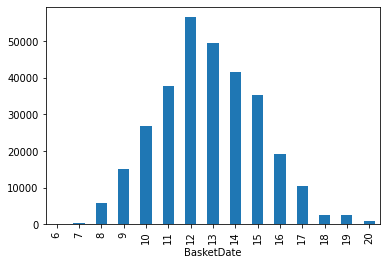

In [191]:
df['BasketDate'].groupby(df['BasketDate'].dt.hour).count().plot(kind='bar');

### Quantities

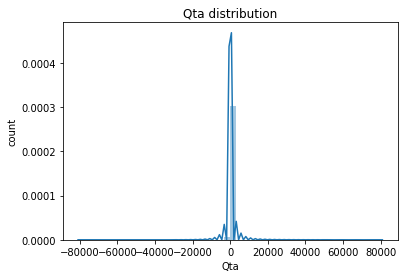

In [192]:
sns.distplot(df['Qta'])
plt.title('Qta distribution')
plt.xlabel('Qta')
plt.ylabel('count');

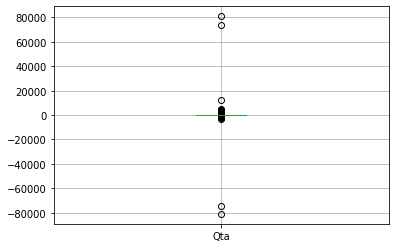

In [193]:
df.boxplot('Qta');

Also, we notice the presence of some negative quantities which can be considered as a canceled orders or refund:

In [194]:
df[df['Qta'] < 0]

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
56,C540006,2011-04-01 10:48:00,2.10,14606,21306,DAISY MIRROR MAGNETS,-1
57,C540007,2011-04-01 11:08:00,2.95,15379,22274,FELTCRAFT DOLL EMILY,-6
359,C540030,2011-04-01 13:47:00,3.75,16029,22070,SMALL RED RETROSPOT MUG IN BOX,-24
548,C540097,2011-04-01 15:46:00,4.65,15373,22835,HOT WATER BOTTLE I AM SO POORLY,-4
549,C540097,2011-04-01 15:46:00,6.75,15373,22179,SET LIGHTS NIGHT OWL,-4
...,...,...,...,...,...,...,...
303930,C581484,2011-09-12 09:27:00,2.08,16446,23843,PAPER CRAFT LITTLE BIRDIE,-80995
303954,C581490,2011-09-12 09:57:00,1.95,14397,22178,VICTORIAN GLASS HANGING TLIGHT,-12
303955,C581490,2011-09-12 09:57:00,0.83,14397,23144,ZINC TLIGHT HOLDER STARS SMALL,-11
304160,C581569,2011-09-12 11:58:00,1.25,17315,84978,HANGING HEART JAR TLIGHT HOLDER,-1


In [195]:
df = df[~df['Qta'] < 0]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
0,539993,2011-04-01 10:00:00,1.95,13313,22386,JUMBO BAG PINK POLKADOT,10
1,539993,2011-04-01 10:00:00,0.42,13313,21499,BLUE POLKADOT WRAP,25
2,539993,2011-04-01 10:00:00,0.42,13313,21498,RED RETROSPOT WRAP,25
3,539993,2011-04-01 10:00:00,2.10,13313,22379,RECYCLING BAG RETROSPOT,5
4,539993,2011-04-01 10:00:00,1.25,13313,20718,RED RETROSPOT SHOPPER BAG,10
...,...,...,...,...,...,...,...
298715,581585,2011-09-12 12:31:00,0.95,15804,23145,ZINC TLIGHT HOLDER STAR LARGE,12
298716,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12
298717,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8
298718,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF HANGING OWLS OLLIE BEAK,24


We can use the interquartile range method to reduce the outliers and distribution skewness:

- IQR = Q3 - Q1
- lower bound = Q1 - 1.5 * IQR
- upper bound = Q3 + 1.5 * IQR

In [196]:
q1 = df['Qta'].quantile(0.25)
q3 = df['Qta'].quantile(0.75)
IQR = q3 - q1
IQR

10.0

In [197]:
df = df[~((df['Qta'] < (q1 - 1.5 * IQR)) | (df['Qta'] > (q3 + 1.5 * IQR)))]
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
0,539993,2011-04-01 10:00:00,1.95,13313,22386,JUMBO BAG PINK POLKADOT,10
1,539993,2011-04-01 10:00:00,0.42,13313,21499,BLUE POLKADOT WRAP,25
2,539993,2011-04-01 10:00:00,0.42,13313,21498,RED RETROSPOT WRAP,25
3,539993,2011-04-01 10:00:00,2.10,13313,22379,RECYCLING BAG RETROSPOT,5
4,539993,2011-04-01 10:00:00,1.25,13313,20718,RED RETROSPOT SHOPPER BAG,10
...,...,...,...,...,...,...,...
298715,581585,2011-09-12 12:31:00,0.95,15804,23145,ZINC TLIGHT HOLDER STAR LARGE,12
298716,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12
298717,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8
298718,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF HANGING OWLS OLLIE BEAK,24


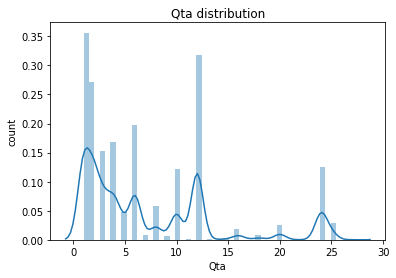

In [199]:
sns.distplot(df['Qta'])
plt.title('Qta distribution')
plt.xlabel('Qta')
plt.ylabel('count');

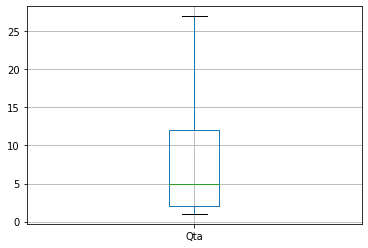

In [198]:
df.boxplot('Qta');

## Saving the new dataset

In [200]:
df.to_csv('../dataset/new_customer_supermarket.csv', sep='\t')